In [37]:
'''
@Author: Venkatesh <br>
@Date: 2024-11-16  <br>
@Last Modified by: Venkatesh <br>
@Last Modified time: 2024-11-10 <br>
@Title: Logistic regression <br>

'''

'\n@Author: Venkatesh <br>\n@Date: 2024-11-16  <br>\n@Last Modified by: Venkatesh <br>\n@Last Modified time: 2024-11-10 <br>\n@Title: Logistic regression <br>\n\n'

In [38]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,roc_curve,auc,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

Logistic Regression

Reading the data file

In [39]:
dataset = pd.read_csv('bank.csv',delimiter=';')
dataset 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Step 1 :- Data Preprocessing

checking null values

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Handling outlier

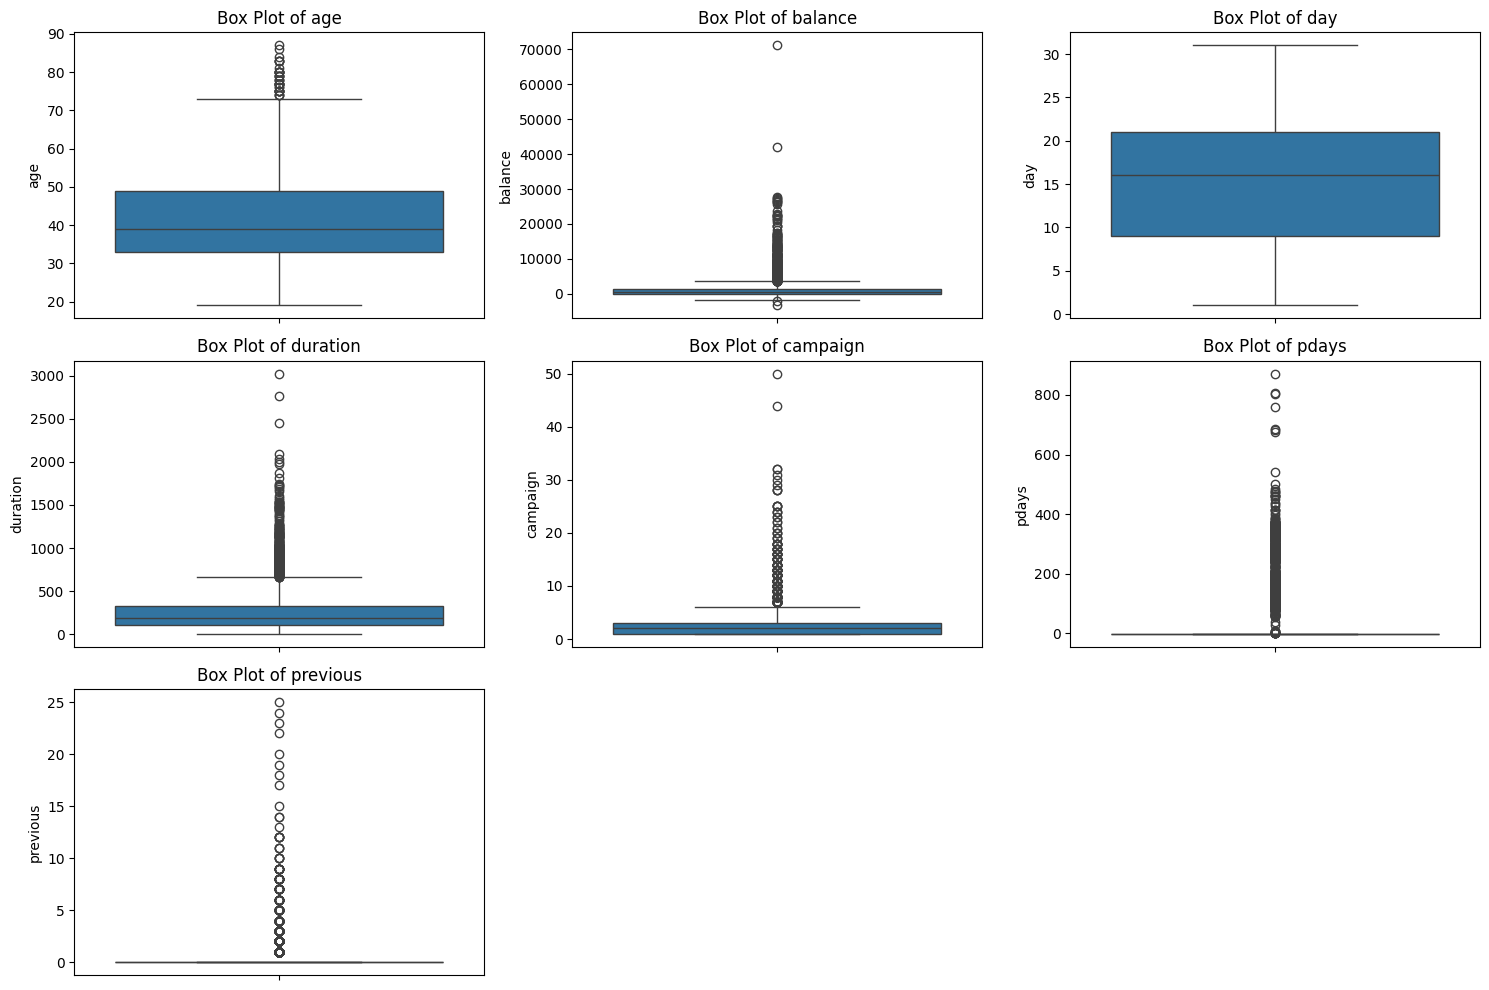

In [41]:
# Plotting box plots for each numerical column to visualize outliers
numerical_columns = dataset.select_dtypes(include=['number']).columns

# Plotting box plots for each numerical column to visualize outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=dataset[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


(2799, 17)
               age      balance          day     duration     campaign  \
count  2799.000000  2799.000000  2799.000000  2799.000000  2799.000000   
mean     40.497678   633.188639    15.801000   209.708467     2.198642   
std       9.868212   876.283335     8.336777   146.281984     1.351878   
min      19.000000 -1746.000000     1.000000     4.000000     1.000000   
25%      33.000000    35.500000     8.000000   101.000000     1.000000   
50%      39.000000   317.000000    16.000000   171.000000     2.000000   
75%      48.000000   959.500000    22.000000   280.500000     3.000000   
max      73.000000  3561.000000    31.000000   665.000000     6.000000   

        pdays  previous  
count  2799.0    2799.0  
mean     -1.0       0.0  
std       0.0       0.0  
min      -1.0       0.0  
25%      -1.0       0.0  
50%      -1.0       0.0  
75%      -1.0       0.0  
max      -1.0       0.0  


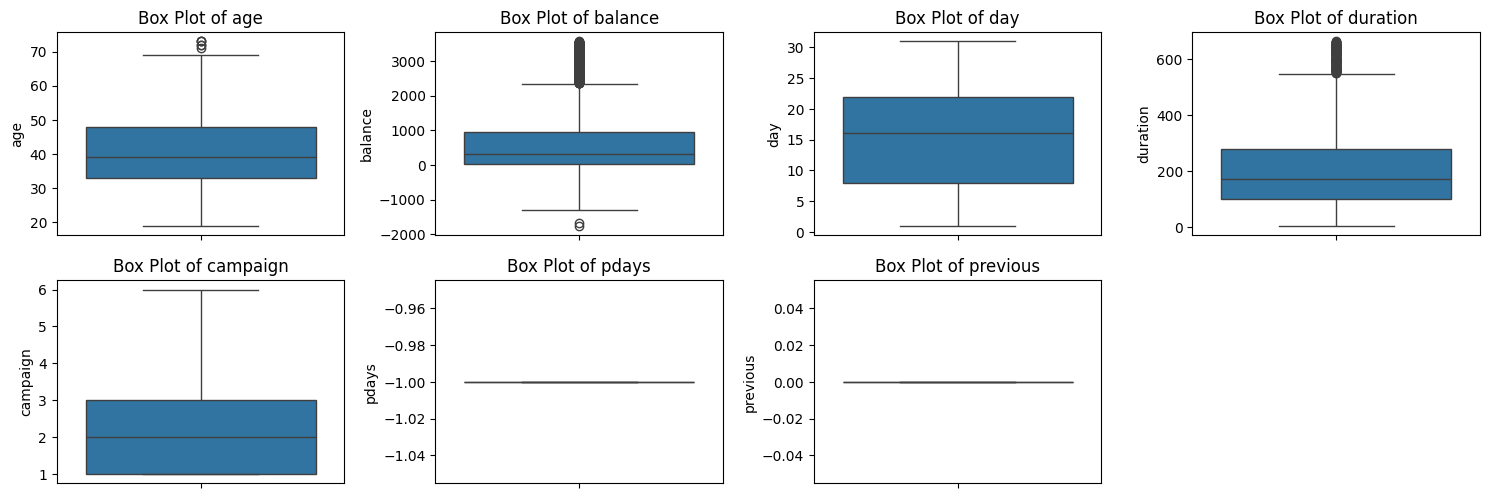

In [42]:
# Capping the outliers in each numerical column
for column in numerical_columns:
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Cap the outliers directly in the dataset copy
    dataset= dataset[(dataset[column]>=lower_bound) & (dataset[column]<=upper_bound)]
print(dataset.shape)

# Checking the summary after handling outliers
print(dataset[numerical_columns].describe())

# Plotting box plots for each column to check if outliers are capped
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=dataset[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

Encoding the data

In [43]:
# Label Encoding
encoder = LabelEncoder()

categorical_col = dataset.select_dtypes(include=['object']).columns

for column in categorical_col:
    dataset[column] = encoder.fit_transform(dataset[column])

dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,0,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,0,0
7,39,9,1,1,0,147,1,0,0,6,8,151,2,-1,0,0,0
8,41,2,1,2,0,221,1,0,2,14,8,57,2,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,36,9,0,1,0,566,1,0,2,20,8,129,2,-1,0,0,0
4512,40,1,1,1,0,1100,1,0,2,29,8,660,2,-1,0,0,0
4513,49,1,1,1,0,322,0,0,0,14,1,356,2,-1,0,0,0
4515,32,7,2,1,0,473,1,0,0,7,5,624,5,-1,0,0,0


In [44]:
feature = dataset.drop(columns=['y'])  # independent
target = dataset['y']  # dependent

Train the model

In [45]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initializing and training the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Confusion matrix

[[789   4]
 [ 42   5]]


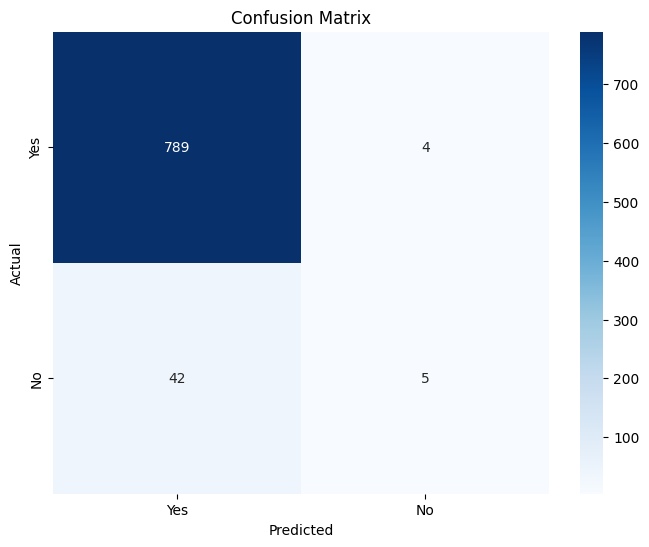

In [46]:
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Displaying Confusion Matrix using CONFUSIONMATRIXDISPLAY

Text(0.5, 0, 'Predicted Valus')

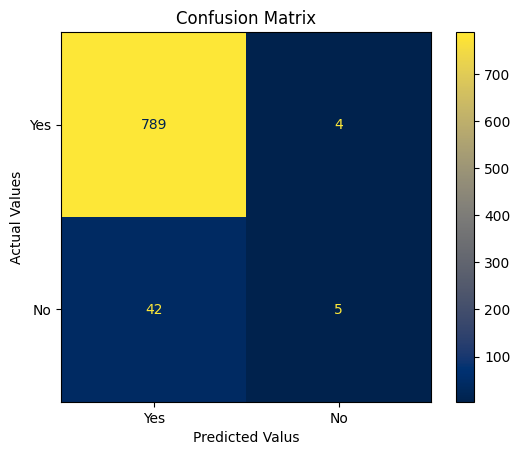

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Yes', 'No'],cmap='cividis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Valus')

In [48]:
print('Accuracy Score',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score 0.9452380952380952
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       793
           1       0.56      0.11      0.18        47

    accuracy                           0.95       840
   macro avg       0.75      0.55      0.58       840
weighted avg       0.93      0.95      0.93       840



In [49]:
y_prob= model.predict_proba(x_test)[:,1]
print(y_prob)

false_positive_rate ,true_positive_rate,threshold = roc_curve(y_test,y_prob)
print(threshold)

roc_auc =auc(false_positive_rate,true_positive_rate)
print(roc_auc)

[4.91919575e-03 3.05697671e-01 3.44147734e-03 1.98946669e-02
 1.01414796e-01 3.33950065e-03 6.00793159e-02 1.57812730e-01
 9.81107594e-02 2.01032719e-02 2.35641108e-01 4.95444157e-02
 4.41997842e-02 3.19918124e-02 3.00226956e-01 3.65589885e-01
 3.71202803e-02 2.61618761e-02 1.60314272e-01 1.52305616e-01
 1.09513387e-01 5.55755871e-02 1.49346092e-02 3.55409095e-01
 1.59187527e-01 8.00902929e-03 5.14117998e-02 6.14053688e-02
 1.32532779e-01 4.70243985e-03 1.82251675e-02 5.18204923e-03
 1.28954373e-02 5.71063910e-02 6.50793671e-03 2.21657409e-02
 7.23629624e-03 1.45781814e-02 3.62119331e-03 2.40064158e-02
 3.98059135e-03 1.22518118e-01 4.87202291e-03 1.03612132e-02
 5.68823996e-03 2.66913752e-02 1.27961133e-02 1.09799170e-02
 2.31135275e-02 2.20013601e-02 2.92648382e-03 4.88464484e-02
 8.76786959e-02 8.27364598e-03 1.92155237e-01 1.24055926e-02
 9.70209771e-02 2.06386209e-02 8.31449243e-03 2.08726531e-02
 1.89450204e-02 1.20995950e-02 8.81678974e-03 2.10793865e-02
 3.29808884e-02 6.286844

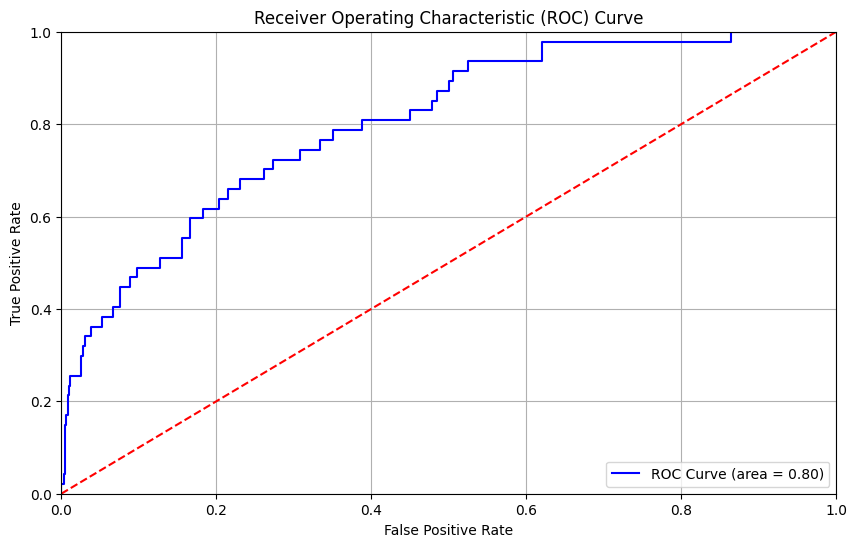

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate, true_positive_rate, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

KNN

In [51]:
classifier = KNeighborsClassifier(n_neighbors=5,p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

Confusion matrix

[[791   2]
 [ 45   2]]


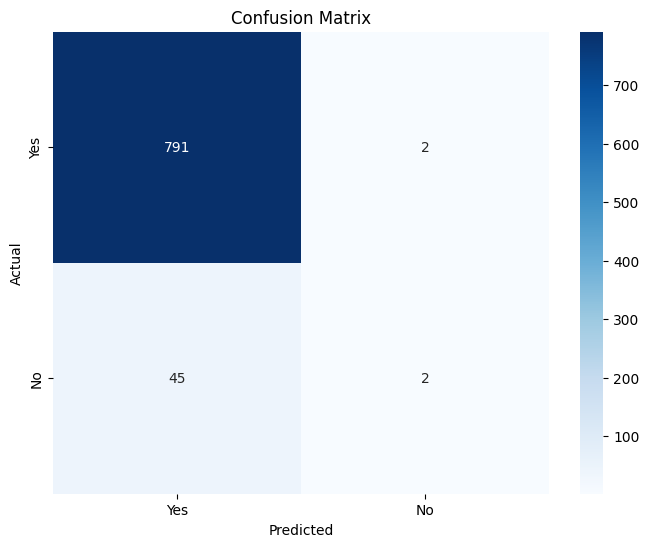

In [52]:
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Display the accuracy

In [53]:
print('Accuracy Score',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score 0.944047619047619
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       793
           1       0.50      0.04      0.08        47

    accuracy                           0.94       840
   macro avg       0.72      0.52      0.52       840
weighted avg       0.92      0.94      0.92       840



In [54]:
y_prob= model.predict_proba(x_test)[:,1]
# print(y_prob)

false_positive_rate ,true_positive_rate,threshold = roc_curve(y_test,y_prob)
print(threshold)

roc_auc =auc(false_positive_rate,true_positive_rate)
# print(roc_auc)

[           inf 7.38479313e-01 6.36984062e-01 6.08693091e-01
 6.02547623e-01 4.70163375e-01 4.66691829e-01 4.61307809e-01
 4.55895933e-01 4.28611674e-01 4.23446513e-01 4.14822405e-01
 3.92143507e-01 3.77173305e-01 3.28766913e-01 3.16361554e-01
 3.07398978e-01 3.05697671e-01 3.02419606e-01 3.00226956e-01
 2.66022224e-01 2.52123918e-01 2.08391445e-01 1.97659784e-01
 1.65667539e-01 1.64733364e-01 1.60314272e-01 1.57812730e-01
 1.46898556e-01 1.44198432e-01 1.33576516e-01 1.32532779e-01
 1.05494310e-01 1.05134438e-01 8.66623418e-02 8.51700514e-02
 8.14393258e-02 7.87659150e-02 7.46894652e-02 7.42633240e-02
 6.86613875e-02 6.85549623e-02 6.61131971e-02 6.60979963e-02
 6.09871369e-02 6.09736620e-02 5.58258453e-02 5.57856883e-02
 5.21208473e-02 5.20177986e-02 4.69363419e-02 4.69286948e-02
 4.31025314e-02 4.29648330e-02 4.08390451e-02 4.07198601e-02
 3.57967852e-02 3.56968354e-02 2.90409412e-02 2.89842936e-02
 2.56364635e-02 2.54245429e-02 2.50155733e-02 2.50011194e-02
 2.37004868e-02 2.368146

ploating the ROC/AUC grapgh

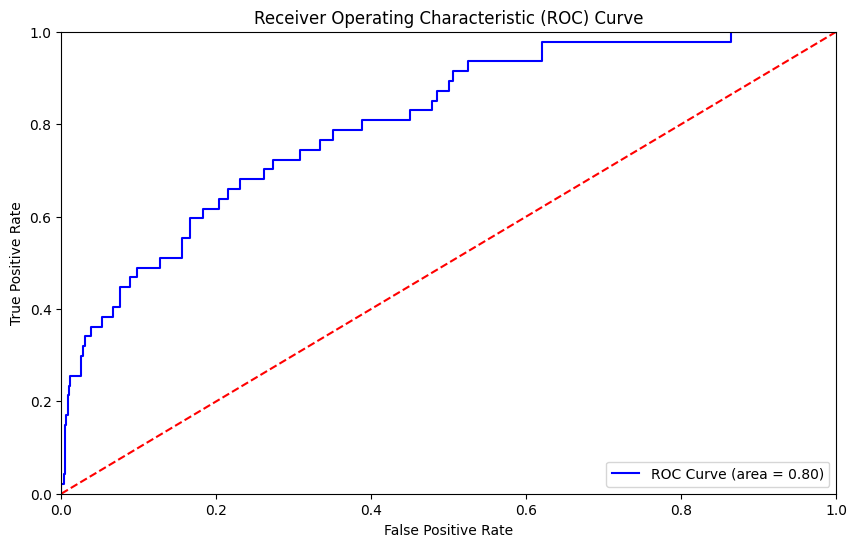

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate, true_positive_rate, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
# plt.grid()
plt.show()